In [16]:
# 1. Importando as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# 1. Importando as bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
# 2. Carregando o conjunto de dados# 2. Carregando o conjunto de dados
iris = load_iris()
X = iris.data  # As caracter√≠sticas (comprimento e largura das p√©talas e s√©palas)
y = iris.target  # A vari√°vel alvo (esp√©cie da flor)

In [26]:
# 3. Dividindo em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Criando e treinando o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 5. Fazendo previs√µes
y_pred = modelo.predict(X_test)

# 6. Avaliando o modelo
print("Acur√°cia:", accuracy_score(y_test, y_pred))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred))

Acur√°cia: 1.0

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



üìÑ Relat√≥rio de Classifica√ß√£o:
Acur√°cia: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



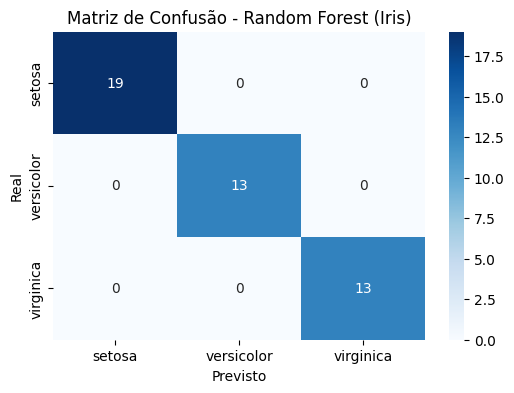

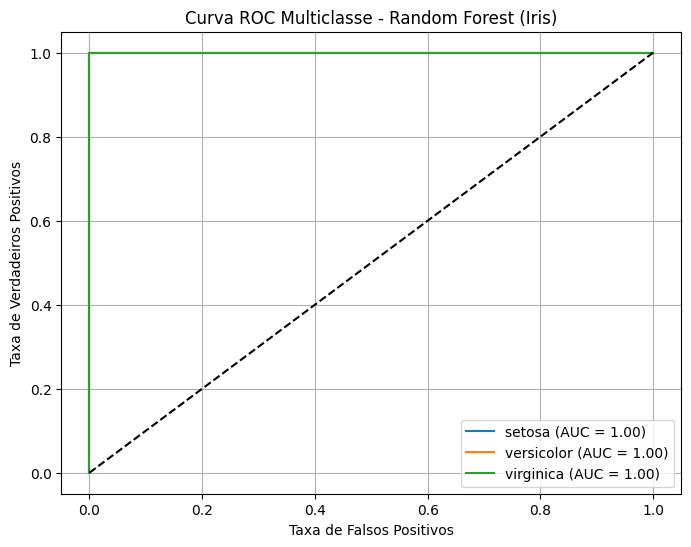

In [27]:
# 1. Importando as bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Carregando o conjunto de dados
iris = load_iris()
X = iris.data
y = iris.target
classes = iris.target_names

# 3. Dividindo em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Criando e treinando o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 5. Fazendo previs√µes
y_pred = modelo.predict(X_test)

# 6. Avalia√ß√£o - Acur√°cia e Relat√≥rio
print("üìÑ Relat√≥rio de Classifica√ß√£o:")
print("Acur√°cia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=classes))

# 7. Matriz de Confus√£o
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confus√£o - Random Forest (Iris)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# 8. Curva ROC AUC - Multiclasse
# Binarizando as classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = modelo.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8, 6))

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC Multiclasse - Random Forest (Iris)')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
